Load Hyperedges
-----------

In [2]:
import sys
sys.path.append("HyperNetX")

import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx

In [3]:
edges = {
    0: ('A', 'B', 'C'),
    1: ('D', 'E', 'F'),
    2: ('B', 'C', 'D', 'E'),
    3: ('A', 'F'),
    4: ('G', 'H', 'I'),
    5: ('J', 'K', 'L'),
    6: ('H', 'I', 'K', 'L'),
    7: ('G', 'J'),
    8: ('A', 'F', 'G', 'J', 'M', 'N'),
}

H = hnx.Hypergraph(edges)

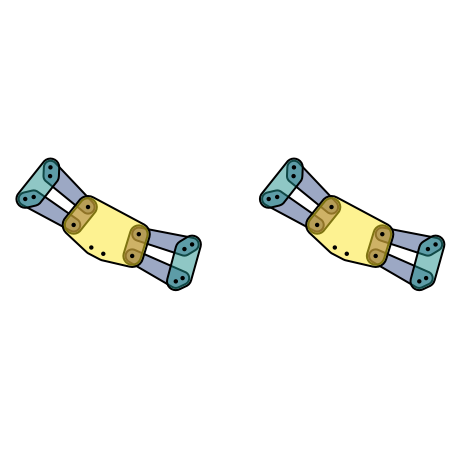

In [4]:
import numpy as np
cmap = plt.cm.viridis
alpha = .5

sizes = np.array([len(e) for e in H.edges()])
norm = plt.Normalize(sizes.min(), sizes.max())

fig, (ax1,ax2) = plt.subplots(1,2)
# ax1 = fig.add_subplot(1,1,1)

pos1 = hnx.drawing.draw(H, ax = ax1,
                 label_alpha=0,
                 edges_kwargs={
                     'facecolors': cmap(norm(sizes))*(1, 1, 1, alpha),
                     'edgecolors': 'black',
                     'linewidths': 2
                 },
                with_edge_labels = False, 
                with_node_labels = False,
                        return_pos= True)

hnx.drawing.draw(H, ax = ax2, pos = pos1,
                 label_alpha=0,
                 edges_kwargs={
                     'facecolors': cmap(norm(sizes))*(1, 1, 1, alpha),
                     'edgecolors': 'black',
                     'linewidths': 2
                 },
                with_edge_labels = False,
                with_node_labels = False)
# plt.show()
# hnx.draw(H, with_edge_labels = False)

In [6]:
# hyperedge_to_core
# cmap(norm(sizes))*(1, 1, 1, alpha)

In [ ]:
# pos1

In [7]:
fig.savefig('coredecomp.svg',bbox_inches = 'tight')

In [ ]:
# Edit the svg in inkscape
# TO DO: Edit hypernetx source code to mark the cores as dotted-line.

In [24]:
H.incidence_dict

{0: {'FN', 'TH'},
 1: {'JV', 'TH'},
 2: {'BM', 'FN', 'JA'},
 3: {'BM', 'CH', 'JU', 'JV'},
 4: {'BM', 'BR', 'CC', 'CH', 'CN', 'JU', 'JV'},
 5: {'GP', 'TH'},
 6: {'GP', 'MP'},
 7: {'GP', 'MA'}}

Sub-hypergraphs (weaker notion) vs Hyper-subgraphs (stronger notion)
----------------

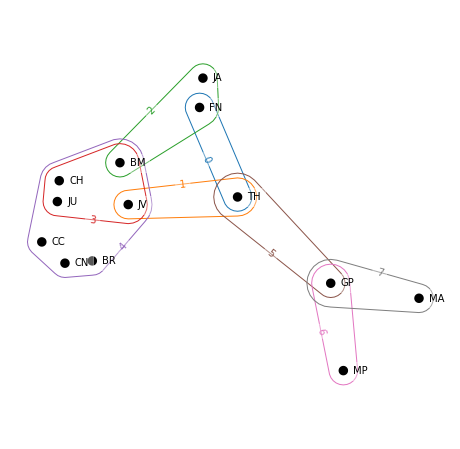

In [13]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)
hnx.draw(H, layout_kwargs = {'seed': 3})

The following is sub-hypergraph
----------

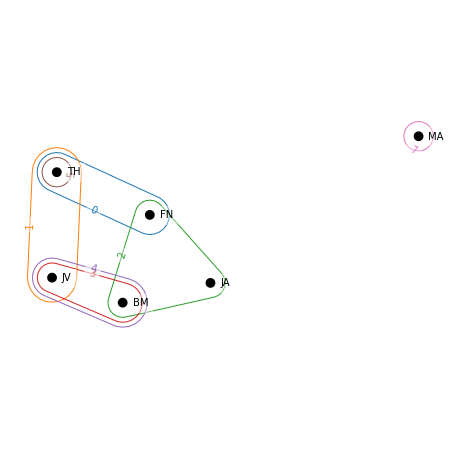

In [14]:
H_restrict_nodes = H.restrict_to_nodes(['JA', 'FN', 'JV',  'BM', 'MA', 'TH'])
hnx.draw(H_restrict_nodes, layout_kwargs = {'seed': 3})

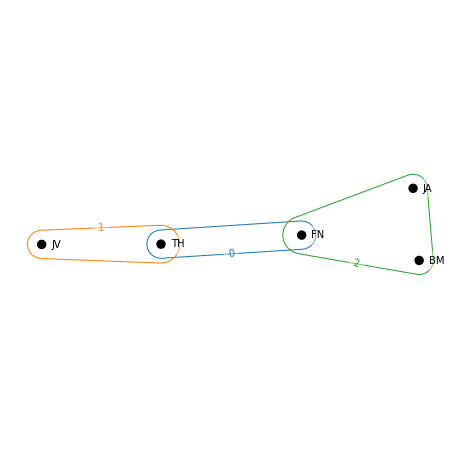

In [32]:
def strong_subgraph(H, vertex_set):
    assert isinstance(H,hnx.Hypergraph)
    X = set(vertex_set)
    _tempdict = {}
    for e_id, e_i in H.incidence_dict.items():
        set_e = set(e_i)
        if set_e.issubset(X):
            _tempdict[e_id] = e_i
    return hnx.Hypergraph(_tempdict)

H_prime = strong_subgraph(H, ['JA', 'FN', 'JV',  'BM', 'MA', 'TH'])
hnx.draw(H_prime)